## Name: Apurva Deshpande 
## MIS: 111903020

## Problem Statement - Detect/ Recognize Sign Language from the Image and Predict the Corresponding Alphabet


## Dataset Used : [Dataset](https://www.kaggle.com/datasets/datamunge/sign-language-mnist)

**Features of Dataset**:
1. No cases for the letters J & Z (Reason: J & Z require motion)
2. GrayScale Images
3. Pixel Values Range From 0 to 255
4. Each image contains 784 Pixels

## Deep Learning Model used: Convolutional Neural Networks (CNN)

In [1]:
# Importing required libraries

from sklearn.preprocessing import LabelBinarizer
from tensorflow import keras
from keras.utils import plot_model

import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

Using TensorFlow backend.


In [2]:
# loading the training data (X+y) (images, labels)
train_df = pd.read_csv('data/alphabet/sign_mnist_train.csv')

In [3]:
# Shuffiling the training dataset randomly
train_df = train_df.sample(frac=1, random_state=42) 

In [4]:
# Split the dataset into X, y (number of pixels of each image, label of the image)
# X = array of int pixel values, y = int value of label (0 to 25 - for A to Z)
X, y = train_df.drop('label', axis=1), train_df['label'] 

In [5]:
# Find data type of X and y
np.unique(X.dtypes), y.dtype

(array([dtype('int64')], dtype=object), dtype('int64'))

In [6]:
# Binarize labels in a one-vs-all fashion (build one-hot encoded vectors from pixel values of each image)
label_binarizer = LabelBinarizer() 
y = label_binarizer.fit_transform(y)

In [7]:
print(y)

[[0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [8]:
# Normalizing the training data and converting the data type to float
X = X/255.0 

In [9]:
np.unique(X.dtypes)

array([dtype('float64')], dtype=object)

In [10]:
# Converting the 1-D array of 784 pixels to (28, 28, 1) Image
# (28, 28) represents the spatial dimensions of the image & 1 specifies that the image is grayscale
X = tf.reshape(X, [-1, 28, 28, 1])

In [11]:
X.shape, y.shape

(TensorShape([27455, 28, 28, 1]), (27455, 24))

In [12]:
# Generating a validation set = dataset to find and optimize best model to predict alphabets from sign language images
X_train, X_valid = X[:25000], X[25000:]
y_train, y_valid = y[:25000], y[25000:]

In [13]:
X_train[0].shape

TensorShape([28, 28, 1])

In [24]:
# Defining the CNN

# 9 layers including - 3 stacked pairs of conventional CNN Layer and Max Pooling Layer
# using relu activation function
# towards the end - output of conventional layers is flattened and given as input to dense CNN layers, using softmax 
# activation function
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (5, 5), padding='same', activation='relu', input_shape=(28, 28, 1)))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Conv2D(64, (5, 5), padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Conv2D(128, (5, 5), padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(24, activation='softmax'))

In [25]:
# Print model summary displaying output & parameters of each layer, loss and accuracy
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 128)         204928    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0

In [26]:
#loss = categorical cross entropy (as we are working on image classification problem)
# evaluation metrics used = accuracy = no. of correctly predicted samples / total no. of samples
# optimizer used = adam
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [27]:
# Saves the best model so far in best model file
save_best_cb = keras.callbacks.ModelCheckpoint('models/final-model', save_best_only=True) 
# Interupts training when there is no progress
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5)

In [28]:
X_valid = np.asarray(X_valid).astype('float32')
y_valid = np.asarray(y_valid).astype('float32')
X_train = np.asarray(X_train).astype('float32')
y_train = np.asarray(y_train).astype('float32')

In [30]:
# The model is same is 'models/final-model'
# The history object is 'models/final-model-history'
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid), callbacks=[save_best_cb, early_stopping_cb])

Epoch 1/20
781/782 [============================>.] - ETA: 0s - loss: 0.2880 - accuracy: 0.9082WARNING:tensorflow:From c:\users\apurva deshpande\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\training\tracking\tracking.py:111: Model.state_updates (from tensorflow.python.keras.engine.training) is deprecated and will be removed in a future version.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: models\final-model\assets
782/782 [==============================] - 72s 92ms/step - loss: 0.2879 - accuracy: 0.9082 - val_loss: 0.0088 - val_accuracy: 0.9996
Epoch 2/20
782/782 [==============================] - 62s 79ms/step - loss: 0.0117 - accuracy: 0.9970 - val_loss: 0.0358 - val_accuracy: 0.9874
Epoch 3/20
782/782 [==============================]

In [32]:
history.history # Contains the training related information for each epoch

{'loss': [0.2879446744918823,
  0.011661103926599026,
  0.013045715168118477,
  9.563583444105461e-05,
  4.572072430164553e-05,
  2.6410960344946943e-05,
  1.5963025361998007e-05,
  1.0467092579347081e-05,
  6.890517852298217e-06,
  4.495299890550086e-06,
  2.988788764923811e-06,
  1.97158533410402e-06,
  1.3871598412151798e-06,
  8.796487804829667e-07,
  5.809738468087744e-07,
  5.277547643345315e-07,
  0.053940027952194214,
  7.630822801729664e-05,
  3.183564331266098e-05,
  1.8578242816147394e-05],
 'accuracy': [0.9082000255584717,
  0.9970399737358093,
  0.9962000250816345,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  0.9847999811172485,
  1.0,
  1.0,
  1.0],
 'val_loss': [0.008834658190608025,
  0.03578425198793411,
  0.00019614427583292127,
  7.579039811389521e-05,
  4.183723285677843e-05,
  2.4821785700623877e-05,
  1.5650055502192117e-05,
  1.0421560546092223e-05,
  6.846281394246034e-06,
  4.779095434059855e-06,
  3.3473027087893

In [33]:
# Saving the history object

with open('models/final-model-history', 'wb') as history_file:
    pickle.dump(history.history, history_file)

In [34]:
h = np.load('models/final-model-history', allow_pickle=True)
h

{'loss': [0.2879446744918823,
  0.011661103926599026,
  0.013045715168118477,
  9.563583444105461e-05,
  4.572072430164553e-05,
  2.6410960344946943e-05,
  1.5963025361998007e-05,
  1.0467092579347081e-05,
  6.890517852298217e-06,
  4.495299890550086e-06,
  2.988788764923811e-06,
  1.97158533410402e-06,
  1.3871598412151798e-06,
  8.796487804829667e-07,
  5.809738468087744e-07,
  5.277547643345315e-07,
  0.053940027952194214,
  7.630822801729664e-05,
  3.183564331266098e-05,
  1.8578242816147394e-05],
 'accuracy': [0.9082000255584717,
  0.9970399737358093,
  0.9962000250816345,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  0.9847999811172485,
  1.0,
  1.0,
  1.0],
 'val_loss': [0.008834658190608025,
  0.03578425198793411,
  0.00019614427583292127,
  7.579039811389521e-05,
  4.183723285677843e-05,
  2.4821785700623877e-05,
  1.5650055502192117e-05,
  1.0421560546092223e-05,
  6.846281394246034e-06,
  4.779095434059855e-06,
  3.3473027087893

In [35]:
best_model = keras.models.load_model('models/final-model') # Model with best set of parameters not necessarily the model at the last epoch of training

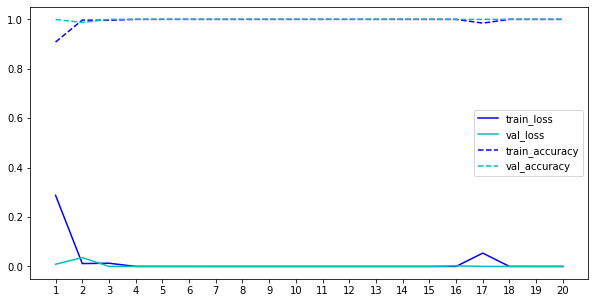

In [36]:
fig, ax = plt.subplots(figsize=(10, 5))
n_epochs = len(h['loss'])
ax.plot(range(1, n_epochs+1), h['loss'], color='b', label='train_loss')
ax.plot(range(1, n_epochs+1), h['val_loss'], color='c', label='val_loss')
ax.plot(range(1, n_epochs+1), h['accuracy'], color='b', label='train_accuracy', linestyle='--')
ax.plot(range(1, n_epochs+1), h['val_accuracy'], color='c', label='val_accuracy', linestyle='--')
ax.set_xticks(range(1, n_epochs+1))
ax.legend()

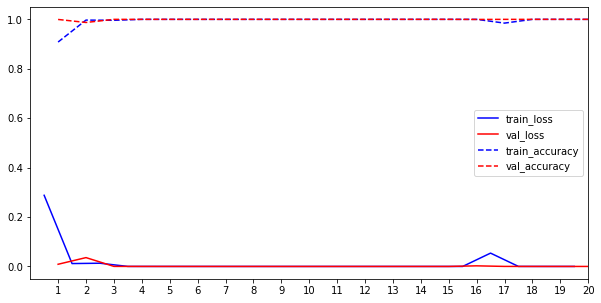

In [37]:
# Training Loss Correction

fig, ax = plt.subplots(figsize=(10, 5))
n_epochs = len(h['loss'])

# Shift training loss by 0.5 as training loss is measured during the epoch and validation loss is measured after the epoch

x_loss = np.arange(n_epochs+1)-0.5
ax.plot(x_loss[x_loss >= 0], h['loss'], color='b', label='train_loss')
ax.plot(range(1, n_epochs+1), h['val_loss'], color='r', label='val_loss')
ax.plot(range(1, n_epochs+1), h['accuracy'], color='b', label='train_accuracy', linestyle='--')
ax.plot(range(1, n_epochs+1), h['val_accuracy'], color='r', label='val_accuracy', linestyle='--')
ax.set_xlim(0, n_epochs)
ax.set_xticks(range(1, n_epochs+1))
ax.legend()

In [38]:
# Defining a function the get the training and validation plots representing the accuracy and loss at each epoch

def get_train_val_plots(h, yticks=None, figsize=(10, 5)):
    # h: Any dictionary like the history.history
    
    fig, ax = plt.subplots(figsize=figsize)
    n_epochs = len(h['loss'])
    x_loss = np.arange(n_epochs+1)-0.5
    
    ax.plot(x_loss[x_loss >= 0], h['loss'], color='b', label='train_loss')
    ax.plot(range(1, n_epochs+1), h['val_loss'], color='r', label='val_loss')
    ax.plot(range(1, n_epochs+1), h['accuracy'], color='b', label='train_accuracy', linestyle='--')
    ax.plot(range(1, n_epochs+1), h['val_accuracy'], color='r', label='val_accuracy', linestyle='--')
    ax.set_xlim(0, n_epochs)
    ax.set_xticks(range(1, n_epochs+1))
    if yticks is not None:
        ax.set_yticks(yticks)
    ax.legend()

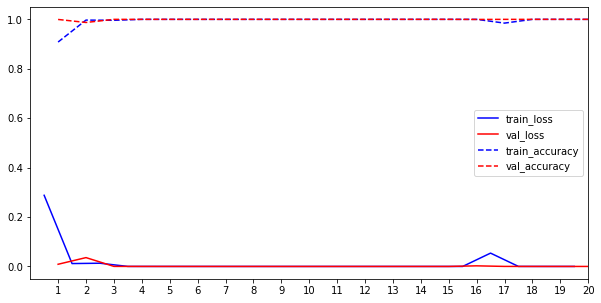

In [39]:
get_train_val_plots(h)

In [40]:
# Test the model on test dataset
# Load the test data
test_df = pd.read_csv('data/alphabet/sign_mnist_test.csv') 

In [41]:
X_test, y_test = test_df.drop('label', axis=1), test_df['label']

In [42]:
X_test = tf.reshape(X_test, [-1, 28, 28, 1])

In [43]:
y_test = label_binarizer.transform(y_test)

In [44]:
best_model.evaluate(X_test, y_test)

225/225 [==============================] - 4s 17ms/step - loss: 86.2299 - accuracy: 0.9416


[86.22994232177734, 0.9415783882141113]

Accuracy: 94.15%

In [45]:
# Preprocesses the input and evaluates the model

def evaluate_model(model, X_test, y_test, label_binarizer):
    X_test_reshape = tf.reshape(X_test, [-1, 28, 28, 1])
    y_test_labels = label_binarizer.transform(y_test)
    results = model.evaluate(X_test_reshape, y_test_labels)
    print(f'Loss: {results[0]:.3f} Accuracy: {results[1]:.3f}')

In [46]:
results = evaluate_model(best_model, test_df.drop('label', axis=1), test_df['label'], label_binarizer)

225/225 [==============================] - 4s 18ms/step - loss: 86.2299 - accuracy: 0.9416
Loss: 86.230 Accuracy: 0.942


# Hyperparameter Tuning

1. Convolution and Max Pooling Pairs
2. Filters in the convolution layers
3. Filter Shape
4. Dropout

## Convolution and Max Pooling Pairs

Before flattening


1. For pair = 1 -> Output to the dense layer will be of the shape `(None, 14, 14, 32)`
2. For pair = 2 -> Output to the dense layer will be of the shape `(None, 7, 7, 64)`
3. For pair = 3 -> Output to the dense layer will be of the shape `(None, 3, 3, 96)`
4. For pair = 4 -> Output to the dense layer will be of the shape `(None, 1, 1, 128)`

As the output shape rapidly decreases for the pair = 4 it is better to choose among the pair = 1, 2 or 3

In [74]:
# 20% Validation Split

X_train, X_valid = X[:19500], X[19500:]
y_train, y_valid = y[:19500], y[19500:]

In [63]:
# Models
# 'models/parameter-tuning-1-1'
# 'models/parameter-tuning-1-2'

# History objects
# 'models/parameter-tuning-1-1-history'
# 'models/parameter-tuning-1-2-history'

n_pairs = 2
models_pairs = [keras.models.Sequential() for i in range(n_pairs)]
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5)

for n in range(1, n_pairs+1):
    models_pairs[n-1].add(keras.layers.Conv2D(32, (5, 5), padding='same', activation='relu', input_shape=(28, 28, 1)))
    models_pairs[n-1].add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
    for i in range(1, n):
        models_pairs[n-1].add(keras.layers.Conv2D(32*(i+1), (5, 5), padding='same', activation='relu'))
        models_pairs[n-1].add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
    models_pairs[n-1].add(keras.layers.Flatten())
    models_pairs[n-1].add(keras.layers.Dense(128, activation='relu'))
    models_pairs[n-1].add(keras.layers.Dense(24, activation='softmax'))
    models_pairs[n-1].compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    save_best_cb = keras.callbacks.ModelCheckpoint(f'models/parameter-tuning-1-{n}', save_best_only=True)
    history = models_pairs[n-1].fit(X_train, y_train, epochs=15, validation_data=(X_valid, y_valid), callbacks=[save_best_cb, early_stopping_cb])
    with open(f'models/parameter-tuning-1-{n}-history', 'wb') as history_file:
        pickle.dump(history.history, history_file)

Epoch 1/15
782/782 [==============================] - 25s 32ms/step - loss: 0.9684 - accuracy: 0.7338 - val_loss: 0.1850 - val_accuracy: 0.9666
Epoch 2/15
782/782 [==============================] - 19s 24ms/step - loss: 0.0750 - accuracy: 0.9897 - val_loss: 0.0271 - val_accuracy: 0.9992
Epoch 3/15
782/782 [==============================] - 21s 26ms/step - loss: 0.0131 - accuracy: 1.0000 - val_loss: 0.0077 - val_accuracy: 1.0000
Epoch 4/15
782/782 [==============================] - 22s 28ms/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 0.0036 - val_accuracy: 1.0000
Epoch 5/15
782/782 [==============================] - 23s 29ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.0017 - val_accuracy: 1.0000
Epoch 6/15
782/782 [==============================] - 20s 26ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0010 - val_accuracy: 1.0000
Epoch 7/15
782/782 [==============================] - 18s 24ms/step - loss: 0.0223 - accuracy: 0.9928 - val_loss: 0.0183 - val_accuracy:

Epoch 14/15
782/782 [==============================] - 49s 63ms/step - loss: 1.0205e-05 - accuracy: 1.0000 - val_loss: 1.1268e-05 - val_accuracy: 1.0000
Epoch 15/15
782/782 [==============================] - 46s 58ms/step - loss: 0.0219 - accuracy: 0.9933 - val_loss: 0.0383 - val_accuracy: 0.9906


In [64]:
# Conventional and Max Pooling Pair-1 Layers Summary
models_pairs[0].summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               802944    
_________________________________________________________________
dense_11 (Dense)             (None, 24)                3096      
Total params: 806,872
Trainable params: 806,872
Non-trainable params: 0
_________________________________________________________________


In [65]:
# Conventional and Max Pooling Pair-2 Layers Summary
models_pairs[1].summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 14, 14, 64)        51264     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)               401536    
_________________________________________________________________
dense_13 (Dense)             (None, 24)               

In [66]:
for index in range(n_pairs):
    model = keras.models.load_model(f'models/parameter-tuning-1-{index+1}')
    model.evaluate(X_valid, y_valid)

77/77 [==============================] - 1s 13ms/step - loss: 1.1268e-05 - accuracy: 1.0000


In [67]:
h_1_1 = np.load('models/parameter-tuning-1-1-history', allow_pickle=True)
h_1_2 = np.load('models/parameter-tuning-1-2-history', allow_pickle=True)

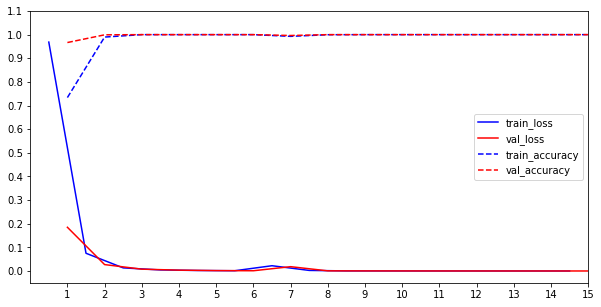

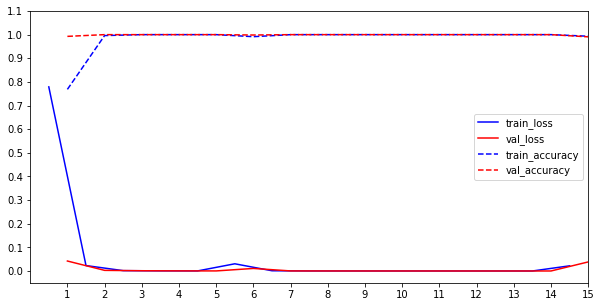

In [68]:
# Plotting the training value for Layer-1
get_train_val_plots(h_1_1, yticks=np.arange(0, 1.2, 0.1))
# Plotting the training value for Layer-2
get_train_val_plots(h_1_2, yticks=np.arange(0, 1.2, 0.1))

## Filters

3 pairs of Convolution and Pooling layers \
Number of filters maps possible:
1. 8 - 16 - 32
2. 16 - 32 - 64
3. 24 - 48 - 96

In [69]:
# Models
# 'models/parameter-tuning-filter-maps-1'
# 'models/parameter-tuning-filter-maps-2'

# History objects
# 'models/parameter-tuning-filter-maps-1-history'
# 'models/parameter-tuning-filter-maps-2-history'

n_tests = 2

models = []
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5)


for i in range(n_tests):
    model = keras.models.Sequential()
    models.append(model)
    model.add(keras.layers.Input(shape=(28, 28, 1)))
    for pairs in range(3):
        model.add(keras.layers.Conv2D((8*(i+1))*(2**pairs), (5, 5), padding='same', activation='relu'))
        model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(128, activation='relu'))
    model.add(keras.layers.Dense(24, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    save_best_cb = keras.callbacks.ModelCheckpoint(f'models/parameter-tuning-filter-maps-{i+1}', save_best_only=True)
    history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid), callbacks=[save_best_cb, early_stopping_cb])
    with open(f'models/parameter-tuning-filter-maps-{i+1}-history', 'wb') as history_file:
        pickle.dump(history.history, history_file)

Epoch 1/10
782/782 [==============================] - 20s 25ms/step - loss: 1.1372 - accuracy: 0.6405 - val_loss: 0.2396 - val_accuracy: 0.9193
Epoch 2/10
782/782 [==============================] - 20s 26ms/step - loss: 0.1019 - accuracy: 0.9701 - val_loss: 0.0789 - val_accuracy: 0.9752
Epoch 3/10
782/782 [==============================] - 19s 25ms/step - loss: 0.0392 - accuracy: 0.9895 - val_loss: 0.0062 - val_accuracy: 0.9996
Epoch 4/10
782/782 [==============================] - 18s 24ms/step - loss: 0.0047 - accuracy: 0.9990 - val_loss: 0.4110 - val_accuracy: 0.8794
Epoch 5/10
782/782 [==============================] - 20s 26ms/step - loss: 0.0312 - accuracy: 0.9904 - val_loss: 5.6280e-04 - val_accuracy: 1.0000
Epoch 6/10
782/782 [==============================] - 20s 26ms/step - loss: 3.3367e-04 - accuracy: 1.0000 - val_loss: 2.2655e-04 - val_accuracy: 1.0000
Epoch 7/10
782/782 [==============================] - 20s 26ms/step - loss: 1.5029e-04 - accuracy: 1.0000 - val_loss: 1.3595

In [70]:
models[0].summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 28, 28, 8)         208       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 14, 14, 16)        3216      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 7, 7, 16)          0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 7, 7, 32)          12832     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 3, 3, 32)          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 288)              

In [71]:
models[1].summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 14, 14, 32)        12832     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 7, 7, 64)          51264     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 3, 3, 64)          0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 576)              

In [72]:
for index in range(n_tests):
    model = keras.models.load_model(f'models/parameter-tuning-filter-maps-{index+1}')
    model.evaluate(X_valid, y_valid)

77/77 [==============================] - 1s 9ms/step - loss: 1.8575e-05 - accuracy: 1.0000


In [73]:
h_2_1 = np.load('models/parameter-tuning-filter-maps-1-history', allow_pickle=True)
h_2_2 = np.load('models/parameter-tuning-filter-maps-2-history', allow_pickle=True)

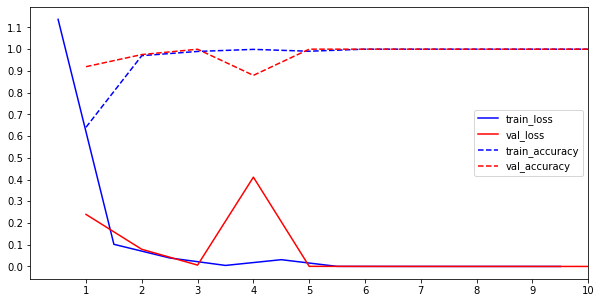

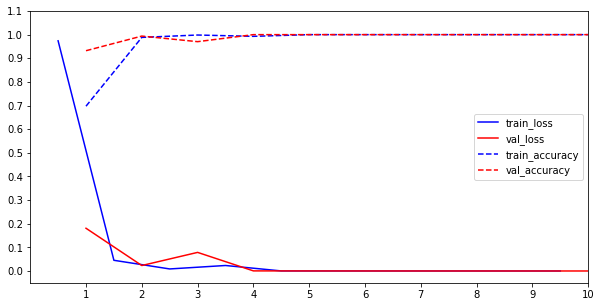

In [74]:
get_train_val_plots(h_2_1, yticks=np.arange(0, 1.2, 0.1))
get_train_val_plots(h_2_2, yticks=np.arange(0, 1.2, 0.1))

## Filter Size

In [75]:
# Models
# 'models/parameter-tuning-filters-1'

# History objects
# 'models/parameter-tuning-filters-1-history'

save_best_cb = keras.callbacks.ModelCheckpoint(f'models/parameter-tuning-filters-1', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5)

model = keras.models.Sequential()
model.add(keras.layers.Conv2D(24, (3, 3), padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Conv2D(48, (3, 3), padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Conv2D(96, (3, 3), padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(24, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid), callbacks=[save_best_cb, early_stopping_cb])
with open(f'models/parameter-tuning-filters-1-history', 'wb') as history_file:
    pickle.dump(history.history, history_file)

Epoch 1/10
782/782 [==============================] - 26s 34ms/step - loss: 0.8412 - accuracy: 0.7458 - val_loss: 0.1228 - val_accuracy: 0.9564
Epoch 2/10
782/782 [==============================] - 24s 31ms/step - loss: 0.0320 - accuracy: 0.9928 - val_loss: 0.0039 - val_accuracy: 0.9996
Epoch 3/10
782/782 [==============================] - 25s 32ms/step - loss: 0.0286 - accuracy: 0.9922 - val_loss: 0.0023 - val_accuracy: 1.0000
Epoch 4/10
782/782 [==============================] - 32s 41ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 7.0278e-04 - val_accuracy: 1.0000
Epoch 5/10
782/782 [==============================] - 26s 34ms/step - loss: 3.6246e-04 - accuracy: 1.0000 - val_loss: 3.2218e-04 - val_accuracy: 1.0000
Epoch 6/10
782/782 [==============================] - 26s 33ms/step - loss: 1.8977e-04 - accuracy: 1.0000 - val_loss: 1.8542e-04 - val_accuracy: 1.0000
Epoch 7/10
782/782 [==============================] - 24s 31ms/step - loss: 1.1070e-04 - accuracy: 1.0000 - val_loss

In [76]:
model = keras.models.load_model('models/parameter-tuning-filters-1')
model.evaluate(X_valid, y_valid)

77/77 [==============================] - 1s 8ms/step - loss: 8.6618e-05 - accuracy: 1.0000


[8.66178233991377e-05, 1.0]

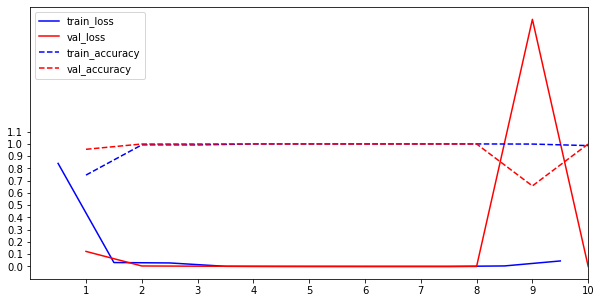

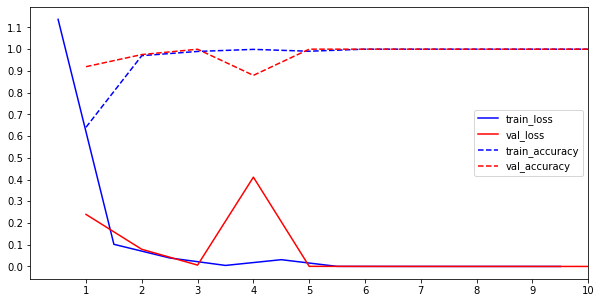

In [80]:
# Increasing filter maps vs Increasing filter size
h_2_3 = np.load('models/parameter-tuning-filter-maps-1-history', allow_pickle=True)
h = np.load('models/parameter-tuning-filters-1-history', allow_pickle=True)
get_train_val_plots(h, yticks=np.arange(0, 1.2, 0.1))
get_train_val_plots(h_2_3, yticks=np.arange(0, 1.2, 0.1))

Therefore, we choose to use filter sizes of (5x5)

## Dropout

In [81]:
# Models
# 'models/parameter-tuning-dropout-1'
# 'models/parameter-tuning-dropout-2'

# History objects
# 'models/parameter-tuning-dropout-1-history'
# 'models/parameter-tuning-dropout-2-history'

early_stopping_cb = keras.callbacks.EarlyStopping(patience=5)

dropout_rates = [0.3, 0.4]

for index, i in enumerate(dropout_rates):
    model = keras.models.Sequential()
    model.add(keras.layers.Conv2D(24, (5, 5), padding='same', activation='relu'))
    model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(keras.layers.Dropout(i))
    model.add(keras.layers.Conv2D(48, (5, 5), padding='same', activation='relu'))
    model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(keras.layers.Dropout(i))
    model.add(keras.layers.Conv2D(96, (5, 5), padding='same', activation='relu'))
    model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(keras.layers.Dropout(i))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(128, activation='relu'))
    model.add(keras.layers.Dropout(i))
    model.add(keras.layers.Dense(24, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    save_best_cb = keras.callbacks.ModelCheckpoint(f'models/parameter-tuning-dropout-{index+1}', save_best_only=True)
    history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid), callbacks=[save_best_cb, early_stopping_cb])
    with open(f'models/parameter-tuning-dropout-{index+1}-history', 'wb') as history_file:
        pickle.dump(history.history, history_file)

Epoch 1/10
782/782 [==============================] - 62s 79ms/step - loss: 1.8016 - accuracy: 0.4313 - val_loss: 0.3238 - val_accuracy: 0.9202
Epoch 2/10
782/782 [==============================] - 61s 78ms/step - loss: 0.3785 - accuracy: 0.8691 - val_loss: 0.0592 - val_accuracy: 0.9862
Epoch 3/10
782/782 [==============================] - 60s 76ms/step - loss: 0.1678 - accuracy: 0.9430 - val_loss: 0.0140 - val_accuracy: 0.9980
Epoch 4/10
782/782 [==============================] - 54s 70ms/step - loss: 0.1041 - accuracy: 0.9644 - val_loss: 0.0048 - val_accuracy: 1.0000
Epoch 5/10
782/782 [==============================] - 57s 73ms/step - loss: 0.0797 - accuracy: 0.9722 - val_loss: 0.0013 - val_accuracy: 1.0000
Epoch 6/10
782/782 [==============================] - 59s 75ms/step - loss: 0.0652 - accuracy: 0.9793 - val_loss: 0.0018 - val_accuracy: 1.0000
Epoch 7/10
782/782 [==============================] - 58s 74ms/step - loss: 0.0584 - accuracy: 0.9808 - val_loss: 0.0016 - val_accuracy:

In [82]:
n_drops = 2
for index in range(n_drops):
    model = keras.models.load_model(f'models/parameter-tuning-dropout-{index+1}')
    model.evaluate(X_valid, y_valid)

77/77 [==============================] - 1s 13ms/step - loss: 2.9853e-04 - accuracy: 1.0000


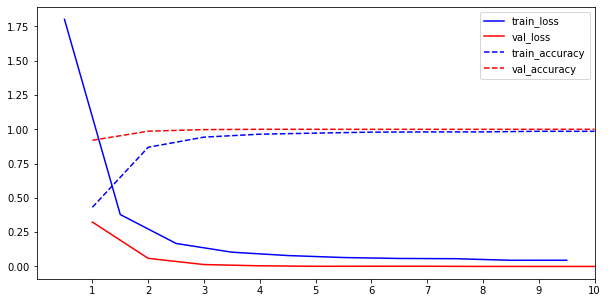

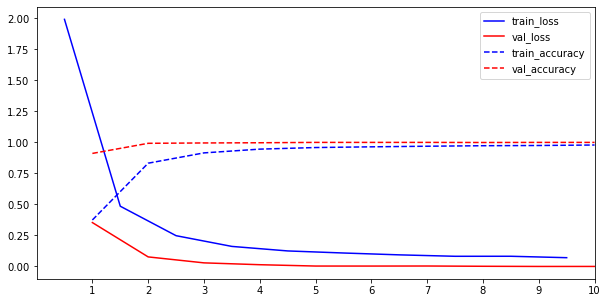

In [83]:
h_1 = np.load('models/parameter-tuning-dropout-1-history', allow_pickle=True)
h_2 = np.load('models/parameter-tuning-dropout-2-history', allow_pickle=True)

get_train_val_plots(h_1)
get_train_val_plots(h_2)

Therefore, we choose model 1

## Final Performance on the Test Dataset after Hyperparameter tuning

In [93]:
test_df = pd.read_csv('data/alphabet/sign_mnist_test.csv')
X_test, y_test = test_df.drop('label', axis=1), test_df['label']

In [94]:
best_model = keras.models.load_model('models/parameter-tuning-dropout-1')

In [95]:
evaluate_model(best_model, X_test, y_test, label_binarizer)

225/225 [==============================] - 3s 14ms/step - loss: 46.4453 - accuracy: 0.9472
Loss: 46.445 Accuracy: 0.947


Accuracy: 95%

In [96]:
test_df = pd.read_csv('data/alphabet/sign_mnist_test.csv')
X_test, y_test = test_df.drop('label', axis=1), test_df['label']

In [97]:
# Applying normalisation which is applied for X_train
X_test /= 255.0

In [98]:
best_model = keras.models.load_model('models/parameter-tuning-dropout-1')

In [99]:
evaluate_model(best_model, X_test, y_test, label_binarizer)

225/225 [==============================] - 3s 13ms/step - loss: 0.1310 - accuracy: 0.9707
Loss: 0.131 Accuracy: 0.971


Accuracy: 97%

In [85]:
## Data Augmentation
# Added more images data by rotating, zooming and translating original images
# Increases the data, hence improves model performance and decreases overfitting

# data_augmentation = keras.models.Sequential()
# data_augmentation.add(keras.layers.RandomRotation(0.1, fill_mode='nearest', input_shape=(28, 28, 1)))
# data_augmentation.add(keras.layers.RandomZoom((0.15, 0.2), fill_mode='nearest'))
# data_augmentation.add(keras.layers.RandomTranslation(0.1, 0.1, fill_mode='nearest'))

# model = keras.models.Sequential()
# model.add(keras.layers.Conv2D(32, (5, 5), padding='same', activation='relu', input_shape=(28, 28, 1)))
# model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
# model.add(keras.layers.Conv2D(64, (5, 5), padding='same', activation='relu'))
# model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
# model.add(keras.layers.Conv2D(128, (5, 5), padding='same', activation='relu'))
# model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
# model.add(keras.layers.Flatten())
# model.add(keras.layers.Dense(128, activation='relu'))
# model.add(keras.layers.Dense(24, activation='softmax'))

# # Print summary of all layers
# model.summary()